In [1]:
# -*- coding: utf-8 -*-
"""
Análise dos LCCs

Amanda V. A. de Luna e Costa
Lívia Calvalcanti Juliao

"""
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [14]:
# Função para pegar o turno do acesso
def pega_turno(num):
    if(num <= 12):
        return "manha"
    elif(num > 12) and (num < 18):
        return "tarde"
    else:
        return "noite"
  
# Função para pegar o intervalo do acesso    
def pega_intervalo(num):
    if(num < 8):
        return "06h-08h"
    elif(num >= 8 and num < 10):
        return "08h-10h"
    elif(num >= 10 and num < 12):
        return "10h-12h"
    elif(num >= 12 and num < 14):
        return "12h-14h"
    elif(num >= 14 and num < 16):
        return "14h-16h"
    elif(num >= 16 and num < 18):
        return "16h-18h"
    else:
        return "18h+"
 
# Função para pegar o dia da semana
def pega_dia(data):
    data = dt.datetime.strptime(data, '%d/%m/%Y')
    dias = ["Seg","Ter","Qua","Qui","Sex","Sab","Dom"]
    dia_semana = dias[data.weekday()]
    return dia_semana


In [15]:
# Lendo o data frame
df = pd.read_csv("/Users/amandaluna/Documents/guardiansAnalytics/data/logs2.csv",names = ["data","hora","maquina","usuario"],sep = ";")


In [16]:
#### Ajeitando o data frame ####

# Acrescentando as colunas ano, mês, dia e dia da semana
df["ano"] = df["data"].apply(lambda x:int(x[6:]))
df["mes"] = df["data"].apply(lambda x:int(x[3:5]))
df["dia"] = df["data"].apply(lambda x:int(x[:2]))
df["dia_da_semana"] = df["data"].apply(lambda x:pega_dia(x))


In [17]:
# Acrescentando as colunas de hora pura,turno e intervalo
df["hora_pura"] = df["hora"].apply(lambda x:int(x[:2]))
df["turno"] = df["hora_pura"].apply(lambda x:pega_turno(x))
df["intervalo"] = df["hora_pura"].apply(lambda x:pega_intervalo(x))


In [18]:
# Pegando o número da máquina, apenas
df["numero_maquina"] = df["maquina"].apply(lambda x:int(x[5:]))


In [19]:
df


,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
0,26/01/2016,15:21:01,lcc2-28,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,28
1,26/01/2016,15:21:04,lcc2-29,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,29
2,26/01/2016,15:30:39,lcc2-26,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,26
3,26/01/2016,15:30:55,lcc2-39,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,39
4,26/01/2016,15:31:17,lcc2-13,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,13
5,26/01/2016,15:31:20,lcc2-09,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,9
6,26/01/2016,15:31:23,lcc2-10,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,10
7,26/01/2016,15:31:25,lcc2-11,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,11
8,26/01/2016,15:31:28,lcc2-12,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,12
9,26/01/2016,15:41:36,lcc2-05,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,5


In [20]:
# Pegar apenas o último usuário de cada célula da coluna usuário
df["usuario"] = df["usuario"].apply(lambda x:x.split(","))
df["usuario"] = df["usuario"].apply(lambda x:x[-1])

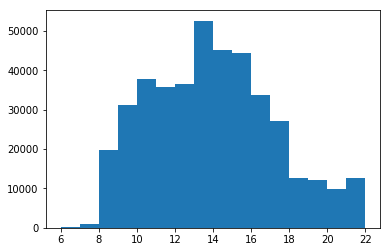

In [21]:
# Plotando a hora pura de todos os anos
x = [i for i in range(6,23)]
plt.hist(df["hora_pura"],bins = x)
plt.show()

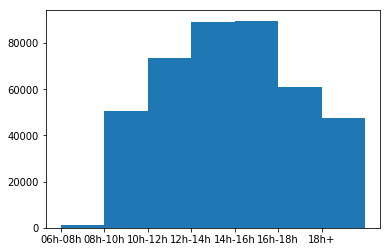

In [23]:
# Plotando o intervalo de horas de todos os anos
x = [i for i in range(8)] 
plt.hist(df["intervalo"],bins = x)
plt.show()

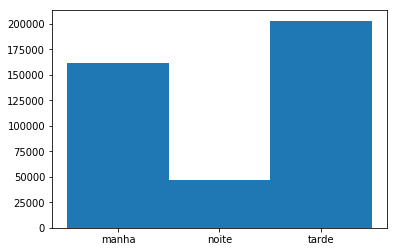

In [28]:
# Plotando o turno de todos os anos
x = [i for i in range(4)]
plt.hist(df["turno"], bins = x,align = "left")
plt.show()

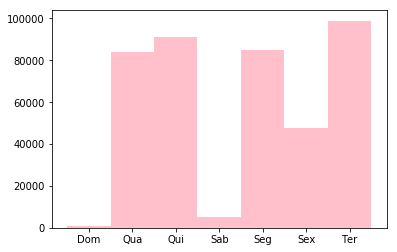

In [37]:
# Plotando os dias da semana de todos os anos
x = [i for i in range(8)]
plt.hist(df["dia_da_semana"], bins = x, align = "left",color = "pink")
plt.show()